To be done:
- DONE (magari può essere fatto meglio, ma non ho voglia e non saprei come) Commento grafici punto 4
- DONE (nel senso che era stupido:))Commento su perchè non sampliamo direttamente dalla posterior nel punto 3 (non sono sicura su questo, samplare dalla posterior sarebbe finalizzato ad utilizzare un diverso stimatore bayesiano (la media della posterior) ho paura che aggiungendo anche questo si vada un po' fuori strada)
- DONE 
Tutti gli esempi - TUTTI.. ne ho guardati un tot - usano la sommatoria nella likelihood solo per $i<j$ e per i termini uguali considerano solo l'influenza di un campo esterno... ce ne freghiamo altamente o facciamo un commento del tipo "a parer nostro l'esponente della likelihood sarebbe dovuto essere ..... , ma ci atteniamo in ogni caso al testo dell'esercizio"?

- Revisione commento delle Frobenius norms nel 3.... le norme non fanno quello che mi aspettavo :O... speravmo che utilizzando la posterior non solo le entrate più grandi si avvicinassero a uno, ma che anche quelle più piccole si avvicinassero a 0 (sempre rispetto ai risultati che si ottengono con il primo Boltmann). Così invece è tutto iù difficile da interpretare... non capisco proprio perchè mai dovrebbero aumentare tutte le entrate. Controllerò di non aver fatto macello nel codice. Perchè se il divario tra strong e weak couplings fosse aumentato avrei potuto fare un commento sulla "bontà della prior" e la cosa mi avrebbe resa tanto felice.
- Se poi per rara fortuna mi accorgo che le norme funzionano davvero come speravo sarebbe forse carino mettere sempre i grafici (se invece continuano ad aumentare tutte le entrate boh, non so se i grafici siano significativi)
- Valutare la bontà del punto 5, non so bene se quel che ho fatto va bene :()

We are given $N=5$ variables and $M$ observations. The observations are:

$$\textbf{x}^{(m)}=(x_1^{(m)},\dots ,x_N^{(m)})$$

Where $x_i^{(m)}\in\{1,\dots,q\}$ are categorical variable. In order to model the interaction between these variables we use the Potts model. Let $J_{ij}\in \R^{q\times q}$ be the coupling matrix for the variables $i$ and $j$ having respectevly colors $a$ and $b$, i.e. if $J_{ij}(a,b)\neq0$ then the variables interact (accordingly to the sign) while if $J_{ij}(a,b)\sim0$ they do not. 

We consider the model:

$$P\left(x\,|\,J\right)=\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Where:

$$Z\left(J\right) = \sum_{x} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

We actually think the model just defined should have had as sum over the variables $i<j$ for $i,j=1,\dots,N$. In fact if we consider all of possible combination of the pairs $(i,j)$ we end up summing twice the interaction between $i$ and $j$ for all $i,j$ (because the interaction $(i,j)$ coincides with $(j,i)$). Therefore in order to avoid this problem we consider just once the couple (not ordered) $\{i,j\}$ by summing over $i<j \quad\forall i,j$.

Therefore we consider the likelihood:

$$\mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)=\prod_m\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}$$

In order to design a Boltzmann machine learing scheme let us compute the log-likelihood divided by $M$ and its derivative with respect to each parameter $J_{ij}(a,b)$:

$$\mathcal{l}\left( J ; \{x^{(m)} \}_{m=1}^{M} \right) = {\frac{1}{M}}  \sum_{ij}\sum_{ab}\sum_m J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

Then:

\begin{align}
\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)} & = {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

Then by Boltzmann machine learning we can inferr the coupling matrices. The first term of the difference is easly computable, the second quite not. In order to reach our goal we can use a MCMC with Metropolis-Hastings update or Gibbs sampling:

$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

For what concernes the MCMC with Metropolis-Hastings update:


- We start from a uniformly randomly extracted configuration $\boldsymbol{x}^{t = 0}$


- As proposal distribution: extract an index $i\in\{1,\dots,N\}$ and a variable $a\in\{1,\dots,q\}$ and substitute the value of $\delta_{(x_i^{t-1},a)}$ with its opposite ($1\rightarrow0$, $0\rightarrow1$)


- Accept the move with probability:

$$p_{\rm acc} =\min\left[1, \frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})} \right]$$

- Save many configuations and compute $<x_{i} x_{j}>_{\mathrm{model}\left(t\right)}$ at $\sim$ equilibrium 

We have to compute the acceptance ration in our setting. By the simmetry of the proposal distribution $q$ we have:

$$\frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})}=\frac{\tilde{\pi}(x)}{\tilde{\pi}(x^{t-1})}$$

We extract the index $i$ and the color $a$ (different from the actual color of $x_i$) and create the proposal $x^n$ as follows:

$$x_k^n=\begin{cases}
x_k & k\neq i \\
a & k=i
\end{cases}$$

Then:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=\frac{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k^n,c)}\delta_{(x_j^n,b)}}}{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k,c)}\delta_{(x_j,b)}}}=\frac{e^{\sum_{kj}J_{kj}(x_k^n,x_j^n)}}{e^{\sum_{kj}J_{kj}(x_k,x_j)}}$$

Then by definition of $x^n$ and the simmetry $J_{ij}(a,b)=J_{ji}(b,a)$ we have:

$$\sum_{k,j}J_{kj}(x_k^n,x_j^n)-\sum_{k,j}J_{kj}(x_k,x_j)=\sum_{k}J_{ki}(x_k^n,x_i^n)-\sum_{k}J_{ki}(x_k,x_i)+\sum_{j}J_{ij}(x_i^n,x_j^n)-\sum_{j}J_{ij}(x_i,x_j)=$$
$$2\sum_{j\neq i}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally assuming $J_{jj}=0 \,\forall j$ we get:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=2\sum_{j}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally update the parameters until convergence, when the maximum value of the gradient is smaller than a certain threshold.

In [111]:
function metropolis_ising(x::Vector{Int64}, J::Array{Matrix{Float64}})

    N = length(x)

    i = rand(1:N)       # draw uniformly an index
    c = rand(1:q-1)     # draw uniformly a color different to the current one of x[i], this is equivalent to uniformly draw a number between 1 and q-1
                        # and then add the drawn number to the current categorical state of x[i]
    xi_new = mod1(x[i]+c, q)
    ΔJ = 0
    for j in 1:N
        if j != i  #we exclude j=i because in the first matrix J we use the proposal  
            ΔJ += 2.0*(J[i,j][xi_new, x[j]] - J[i,j][x[i], x[j]])   # argument of the exponential given by the ratio of the target distribution
        end
    end
    ΔJ += (J[i,i][xi_new, xi_new] - J[i,i][x[i], x[i]])
    if rand() < exp(ΔJ)
        x[i] = xi_new    # if the move is accepted, we update it
    end
    return x

end

metropolis_ising (generic function with 1 method)

In [112]:
function compute_stats(data::Matrix{Int64}, M::Int64; q = 4) #M is the number of observations considered
    N = size(data, 2)
    if M>size(data, 1)
        print("Too large M")
    else
        sij = Array{Matrix{Float64}}(undef, N, N) 
        for i in eachindex(sij)
            sij[i] = zeros(Float64, q, q)
        end

        for i in 1:N, j in 1:N
            for m in 1:M
                sij[i,j][data[m,i], data[m,j]] += 1
            end
            sij[i,j] ./= M
            #sij[j,i] .= sij[i,j]'
        end

        return sij  # this gives us the sample frequencies
    end
end

compute_stats (generic function with 1 method)

In [113]:
using CSV
using DataFrames

df = DataFrame(CSV.File("C:\\Users\\loren_1hne11w\\Documents\\Models&Algorithms\\data.dat", delim = " ", header = false))
select!(df, Not( :Column6))
xdata = Matrix{Int64}(df)
#"C:\\Users\\lucia\\OneDrive\\Desktop\\Documenti\\Collegio Carlo Alberto\\Models and Algorithms\\data.dat"

2000×5 Matrix{Int64}:
 2  4  1  1  4
 2  1  1  2  2
 4  1  4  4  3
 1  4  3  1  2
 4  2  2  2  3
 3  3  2  2  3
 4  1  3  4  2
 2  4  3  4  1
 4  1  3  4  3
 2  4  2  4  4
 ⋮           
 2  4  4  1  3
 2  1  1  4  3
 4  2  1  1  4
 2  4  3  1  4
 1  4  4  4  1
 4  1  1  2  3
 3  4  3  2  4
 3  3  1  4  4
 3  4  2  1  4

In [114]:
M = size(xdata, 1)
sij = compute_stats(xdata, M)

5×5 Matrix{Matrix{Float64}}:
 [0.2555 0.0 0.0 0.0; 0.0 0.2545 0.0 0.0; 0.0 0.0 0.2345 0.0; 0.0 0.0 0.0 0.2555]                              …  [0.074 0.0605 0.0575 0.0635; 0.067 0.07 0.0535 0.064; 0.055 0.0565 0.068 0.055; 0.0655 0.057 0.063 0.07]
 [0.03 0.0735 0.056 0.083; 0.072 0.0315 0.072 0.073; 0.0855 0.069 0.032 0.0695; 0.068 0.0805 0.0745 0.03]         [0.067 0.06 0.056 0.0595; 0.064 0.0605 0.0595 0.0645; 0.068 0.063 0.0635 0.0615; 0.0625 0.0605 0.063 0.067]
 [0.025 0.075 0.0615 0.086; 0.0755 0.03 0.074 0.071; 0.077 0.0755 0.0275 0.071; 0.078 0.074 0.0715 0.0275]        [0.023 0.078 0.0655 0.081; 0.078 0.0255 0.0745 0.0725; 0.081 0.0695 0.0295 0.071; 0.0795 0.071 0.0725 0.028]
 [0.069 0.053 0.0575 0.0595; 0.0585 0.073 0.0595 0.0655; 0.0645 0.0685 0.0555 0.05; 0.0635 0.06 0.062 0.0805]     [0.025 0.0685 0.068 0.0775; 0.0855 0.0275 0.07 0.0735; 0.0755 0.067 0.023 0.073; 0.0755 0.081 0.081 0.0285]
 [0.074 0.067 0.055 0.0655; 0.0605 0.07 0.0565 0.057; 0.0575 0.0535 0.068 0.063; 0.06

In [115]:
using ProgressMeter
using Distributions

function boltzmann_learning(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij .- sij_model
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        #ε = maximum.([abs.(Δsij[i]) for i in eachindex(Δsij)])     # to check whether we have reached convergence or not
        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning (generic function with 1 method)

In [116]:
N = 5
q = 4

J = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J)
    J[i] = zeros(Float64, q, q)
end


In [117]:
J, sij_model, ε, xall = boltzmann_learning(sij, J, λ = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:01
  ε:  0.063

Learning... 3 	 Time: 0:00:01
  ε:  0.048

Learning... 4 	 Time: 0:00:02
  ε:  0.046

Learning... 5 	 Time: 0:00:03
  ε:  0.07550000000000001

Learning... 6 	 Time: 0:00:03
  ε:  0.046

Learning... 7 	 Time: 0:00:04
  ε:  0.0635

Learning... 8 	 Time: 0:00:04
Learning... 9 	 Time: 0:00:05
  ε:  0.04250000000000001

Learning... 10 	 Time: 0:00:05
  ε:  0.04049999999999998

Learning... 11 	 Time: 0:00:06
  ε:  0.041000000000000036

Learning... 12 	 Time: 0:00:06
  ε:  0.025999999999999995

Learning... 13 	 Time: 0:00:07
  ε:  0.03849999999999999

Learning... 14 	 Time: 0:00:07
  ε:  0.038500000000000006

Learning... 15 	 Time: 0:00:07
  ε:  0.04350000000000001

Learning... 16 	 Time: 0:00:08
  ε:  0.03699999999999999

Learning... 17 	 Time: 0:00:08
  ε:  0.02999999999999997

Learning... 18 	 Time: 0:00:09
  ε:  0.0625

Learning... 19 	 Time: 0:00:09
  ε:  0.03399999999999999

Learning... 20 	 Time: 0:00:10
  ε:  0.027500000000000004

Learning... 21 	 Time: 0:00:10
  ε:  0.0345

Learning... 22 	 Time: 0:00:10
  ε:  0.05349999999999999

Learning... 23 	 Time: 0:00:11
  ε:  0.05499999999999999

Learning... 24 	 Time: 0:00:11
  ε:  0.032999999999999974

Learning... 25 	 Time: 0:00:12
  ε:  0.04299999999999998

Learning... 26 	 Time: 0:00:12
  ε:  0.03849999999999998

Learning... 27 	 Time: 0:00:13
  ε:  0.034499999999999975

Learning... 28 	 Time: 0:00:13
  ε:  0.034499999999999975

Learning... 29 	 Time: 0:00:14
  ε:  0.035

Learning... 30 	 Time: 0:00:14
  ε:  0.05099999999999999

Learning... 31 	 Time: 0:00:14
  ε:  0.05449999999999999

Learning... 32 	 Time: 0:00:15
  ε:  0.040999999999999995

Learning... 33 	 Time: 0:00:15
  ε:  0.04450000000000001

Learning... 34 	 Time: 0:00:16
  ε:  0.044

Learning... 35 	 Time: 0:00:16
  ε:  0.04049999999999998

Learning... 36 	 Time: 0:00:17
  ε:  0.03900000000000001

Learning... 37 	 Time: 0:00:17
  ε:  0.04049999999999998

Learning... 38 	 Time: 0:00:17
  ε:  0.02749999999999997

Learning... 39 	 Time: 0:00:18
  ε:  0.04100000000000001

Learning... 40 	 Time: 0:00:18
  ε:  0.04250000000000001

Learning... 41 	 Time: 0:00:19
  ε:  0.05249999999999999

Learning... 42 	 Time: 0:00:19
  ε:  0.04899999999999999

Learning... 43 	 Time: 0:00:20
  ε:  0.036

Learning... 44 	 Time: 0:00:20
  ε:  0.05249999999999999

Learning... 45 	 Time: 0:00:20
  ε:  0.0325

Learning... 46 	 Time: 0:00:21
  ε:  0.032999999999999974

Learning... 47 	 Time: 0:00:21
  ε:  0.036500000000000005

Learning... 48 	 Time: 0:00:22
  ε:  0.035500000000000004

Learning... 49 	 Time: 0:00:22
  ε:  0.05099999999999999

Learning... 50 	 Time: 0:00:23
  ε:  0.05199999999999999

Learning... 50 	 Time: 0:00:23


([[-0.0028499999999999164 0.0 0.0 0.0; 0.0 0.0014500000000000235 0.0 0.0; 0.0 0.0 -0.007350000000000774 0.0; 0.0 0.0 0.0 0.008750000000000044] [-0.3208000000000003 0.08819999999999976 0.18095000000000006 0.04880000000000027; 0.10554999999999977 -0.31025000000000025 0.06750000000000023 0.13865; 0.01820000000000005 0.12279999999999971 -0.28960000000000047 0.14124999999999968; 0.17790000000000025 0.1056999999999997 0.049350000000000234 -0.32420000000000027] … [0.0355000000000001 -0.05994999999999979 0.06405 -0.042449999999999925; -0.05350000000000008 0.04089999999999977 0.03885000000000036 -0.024800000000000145; -0.0104499999999999 0.028349999999999816 -0.030250000000000016 0.004999999999999954; 0.012349999999999877 0.006350000000000114 -0.08739999999999981 0.07745000000000009] [0.00039999999999974886 -0.0017500000000001397 -0.014249999999999883 0.01274999999999997; 0.012700000000000206 0.03380000000000024 -0.05265000000000007 0.0076000000000000685; -0.03749999999999991 0.0122500000000000

Up to now we have made inference on the coupling matrix J. 

The next step consists in capturing the topology of the network of pairwise couplings. Since the coupling matrices J are not straightforward to interpret, we rely on a different tool, the Frobenius norm of each coupling matrix $J_{ij}$.

The underlying idea is the following:
to assess the topology, we need to map each $q × q$ coupling matrix $J_{ij}$ onto a scalar quantity measuring the coupling strength between the two variables i and j.

$$F_{ij} = \sqrt{\sum_{a,b}J_{ij}(a,b)^2}$$

Once all the Frobenius norms are computed, the "interacting" sites can be inferred as those site pairs with the strongest couplings.

In [118]:
function Frobenius(J::Array{Matrix{Float64}})
    N = size(J,1)
    q = size(J[1], 1)

    Fij = zeros(Float64, N, N)
    for i in 1:N, j in 1:N
        for a in 1:q, b in 1:q
            Fij[i,j] += (J[i,j][a,b])^2
        end
        Fij[i,j] = sqrt(Fij[i,j])
    end
    return Fij
end

Frobenius (generic function with 1 method)

In [119]:
Fij = Frobenius(J)

5×5 Matrix{Float64}:
 0.0118663  0.739314   0.833889   0.181937   0.116323
 0.739314   0.0222669  0.131486   0.820522   0.111426
 0.833889   0.131486   0.0147603  0.0983372  0.866823
 0.181937   0.820522   0.0983372  0.0308664  0.900259
 0.116323   0.111426   0.866823   0.900259   0.0196338

In [120]:
using CSV
using DataFrames
groundtruth = DataFrame(CSV.File("groundtruth.dat", delim = " ", header = false))
F = Matrix{Int64}(groundtruth)
f_true=zeros(5,5)
for i in 1:5
    f_true[i,F[i,1]] = 1
    f_true[i,F[i,2]] = 1
end
f_true

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

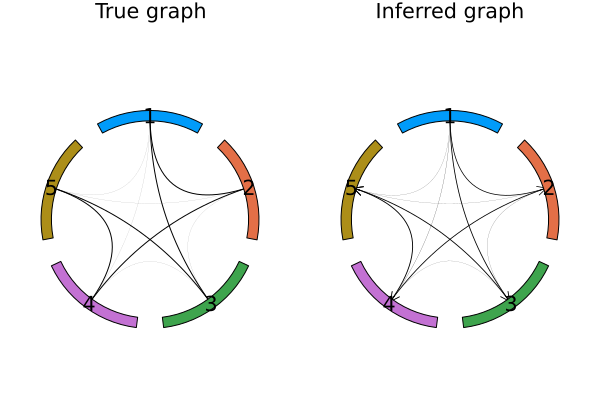

In [121]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)


The inferred graph clearly shows that the true couplings are correctly inferred by the Boltzmann machine.

In [122]:
Z = Any[]
for i in 1:size(Fij,1)
    for j in i+1:size(Fij,2)
        if Fij[i,j]>0.7
            push!(Z, [i,j])
        end
    end
end

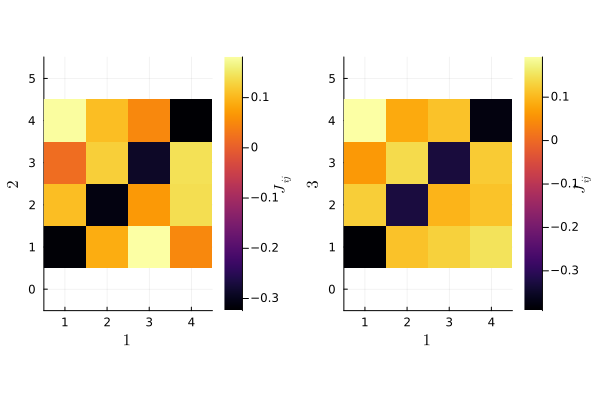

In [123]:
using Plots
using LaTeXStrings
p = Any[]
for i in 1:size(Z,1)
    g = heatmap(J[Z[i][1], Z[i][2]], xlabel = L"%$(Z[i][1])", ylabel = L"%$(Z[i][2])", colorbar_title = L"J_{ij}")
    push!(p,g)
end
plot(p[1], p[2], aspect_ratio = 1)

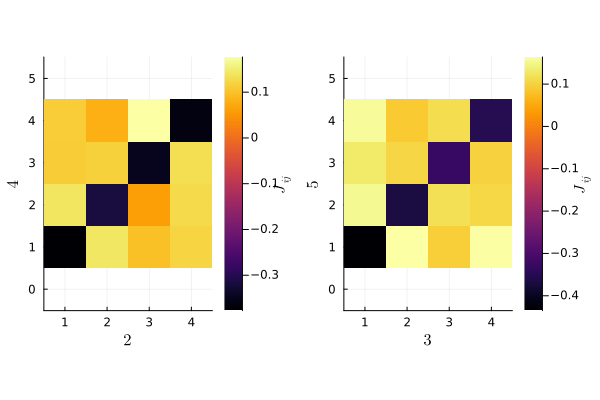

In [124]:
plot(p[3], p[4], aspect_ratio = 1)

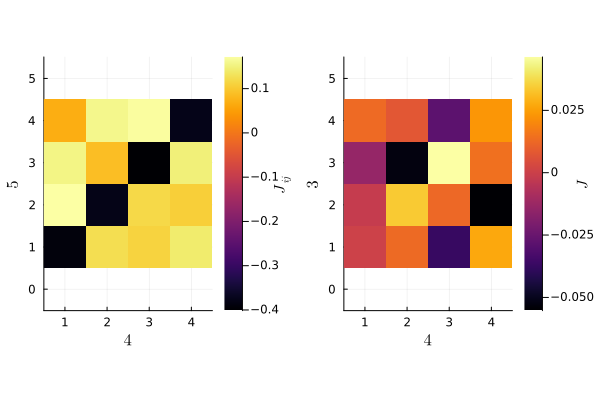

In [125]:
uncorrelated = heatmap(J[5,1], xlabel = L"4", ylabel = L"3", colorbar_title = L"J")
plot(p[5], uncorrelated, aspect_ratio = 1)

It is interesting to perform again the estimation of $J$ using a different, Bayesian, approach and then compare the results.

The underlying intuition is the following:

The above "frequentist" Boltzmann machine is aimed at returning a point estimate of J as a result of a maximization problem. In particular, it performs a gradient ascend method in order to maximize the likelihood function and thus it finds numerically the maximum likelihood estimator (MLE) of J, i.e. the value of J for which, under the assumed statistical model, the observed data have the highest joint probability. To better understand its meaning, it is useful to recall that everytime we perform a ML estimation, we are assuming (as in all frequentist statistical inference procedures) a true generating mechanism, that is to say the existence of a true, but unknown, value of the parameter that has generated the data and that we aim to unveil. Thanks to their straightforward interpretation and their "good" properties, MLEs are often used to approximate the true parameter and ML estimation has become a dominant tool to make statistical inference.

What we present next requires the switch from a frequentist to a Bayesian point of view.

Bayesian statisticians consider the parameter as an actual random variable which, therfore, has its own probability distribution. Loosely speaking, in Bayesian statistics a probability expresses a degree of belief: before performing the experiment, the prior distribution of the parameter encodes the a-priori beliefs about the parameter, i.e. what we expect, for any kind of reason, before observing the data. After collecting the data, Bayes theorem is used to incorporate these information in the prior distribution. The result is the so-called posterior distribution of the considered parameter and it embodies our updated beliefs about the parameter, once evidence is observed. The posterior distribution contains our full knowledge about the parameter.

Mathematically, given a prior probability $P(\theta)$ and a likelihood function $P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right)$, the posterior distribution of $\theta$ is, up to a proportionality constant, obtained as

$$P\left(\theta | \,\left\{x^{(m)}\right\}_{i=1}^M\right) \quad \propto \quad P(\theta) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right) $$

The posterior distribution is at the heart of Bayesian inference. Indeed, depending on the situations, meaningful statistics of the parameter can be derived from it and used as estimates of the parameter itself. To be more precise, Bayesian estimation methods are based on the minimization of the posterior risk with respect to a specified loss function. For instance, for a quadratic loss, an absolute error loss or the 0-1 loss function, the Bayes estimator is given, respectively, by the posterior mean, median and mode.

To be more complete, let us mention the fact that dealing with the 0-1 loss function is actually trickier. Everything works fine in the discrete case, whereas in the continuous one it needs to be expressed in terms of the Dirac delta distribution (and thus it would not be properly a function anymore).

In the particular situation we are considering, we aim at modifying the Boltzmann machine so that it would not return the MLE of our parameter $J$, but an estimate that "exploits" its posterior distribution. As we have shortly argued above, there is not a unique choice for the estimator to be used, nevertheless the maximum a posteriori (MAP) estimate appeared to us as the most natural one.

The MAP estimate is, by definition, the value that maximizes the posterior distribution (its mode):
$$J_{MAP} = \argmax_{J} P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)$$

Its interpretation is clear: it corresponds to the "point" in the parameter space with the "highest probability of occurence", given both the observed data and prior information.

It is also interesting (and easy to observe) that if the prior distribution over the parameter is chosen to be uniform, then the MAP estimate actually coincides with the MLE. Generally a uniform prior distribution is interpreted as an uninformative prior distribution, meaning that it is used when no prior information is available or to prevent our prior beliefs from affecting the results. As a consequence the posterior distribution will be totally specified by the likelihood function and the MLE will be retrieved. This provides further support to our estimation choice: the previous estimation procedure intrinsically emerges as a special case (the one corresponding to a uniform prior distribution) of the method we are going to present.

As a final remark, we can say that the MAP estimate can be considered a "Bayesian generalization of the MLE", since it corresponds to the mode of an augmented optimization objective which incorporates the prior distribution (that quantifies the a-priori additional information available).

Given everything we have said, let us design the new Boltzmann machine learning scheme. Exactly as before, we need to compute the gradient of the objective function we want to maximizes:

$$\begin{aligned}
P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right) = \quad \propto \quad &P(J) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,J \right)\\ & e^{-\lambda \sum_{a,b,i,j}\lvert J_{ij}(a,b) \rvert} \, \prod_m\frac{1}{Z}e^{\sum_{i,j}\sum_{a,b}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}
\end{aligned}$$

It is convenient to take its logarithm and divide everything by M:
$$ (\star) \quad \frac{1}{M} log\left(P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)\right) = - \frac{\lambda}{M}\sum_{a,b,i,j} \lvert J_{ij}(a,b) \rvert + {\frac{1}{M}} \sum_{i,j}\sum_{a,b}\sum_mJ_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

We can now derive the gradient:
\begin{align}
\frac{\partial (\star) }{\partial J_{i,j}(a,b)} & = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

The Boltzmann machine learning scheme can therefore being updated as follows:
$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) \, {-\frac{\lambda*\lambda_{J}}{M}} sign\left( J_{i,j}(a,b) \right) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

In [126]:
using ProgressMeter
using Distributions

function boltzmann_learning_MAP(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, λ_prior::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij  .- sij_model 
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        for i in 1:N, j in 1:N
            J[i,j] = J[i,j] + (0.1*λ)/dmax .* sign.(J[i,j])
        end
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning_MAP (generic function with 1 method)

In [127]:
N = 5
q = 4

J_MAP = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_MAP)
    J_MAP[i] = zeros(Float64, q, q)
end

J_MAP, sij_model, ε, xall = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:01
  ε:  0.051

Learning... 3 	 Time: 0:00:01
  ε:  0.04700000000000001

Learning... 4 	 Time: 0:00:02
  ε:  0.0475

Learning... 5 	 Time: 0:00:02
  ε:  0.0445

Learning... 6 	 Time: 0:00:03
  ε:  0.044499999999999984

Learning... 7 	 Time: 0:00:03
  ε:  0.056999999999999995

Learning... 8 	 Time: 0:00:04
  ε:  0.03550000000000003

Learning... 9 	 Time: 0:00:04
  ε:  0.068

Learning... 10 	 Time: 0:00:04
  ε:  0.0325

Learning... 11 	 Time: 0:00:05
  ε:  0.04500000000000001

Learning... 12 	 Time: 0:00:05
  ε:  0.03649999999999998

Learning... 13 	 Time: 0:00:06
  ε:  0.04300000000000001

Learning... 14 	 Time: 0:00:06
  ε:  0.0645

Learning... 15 	 Time: 0:00:07
  ε:  0.0345

Learning... 16 	 Time: 0:00:07
  ε:  0.033

Learning... 17 	 Time: 0:00:08
  ε:  0.04849999999999999

Learning... 18 	 Time: 0:00:08
  ε:  0.046499999999999986

Learning... 19 	 Time: 0:00:09
  ε:  0.0445

Learning... 20 	 Time: 0:00:09
  ε:  0.05049999999999999

Learning... 21 	 Time: 0:00:09
  ε:  0.05499999999999999

Learning... 22 	 Time: 0:00:10
  ε:  0.03199999999999997

Learning... 23 	 Time: 0:00:10
  ε:  0.043999999999999984

Learning... 24 	 Time: 0:00:11
  ε:  0.0345

Learning... 25 	 Time: 0:00:11
  ε:  0.028999999999999998

Learning... 26 	 Time: 0:00:12
  ε:  0.034499999999999975

Learning... 27 	 Time: 0:00:12
  ε:  0.0595

Learning... 28 	 Time: 0:00:13
  ε:  0.033499999999999974

Learning... 29 	 Time: 0:00:13
  ε:  0.05149999999999999

Learning... 30 	 Time: 0:00:14
  ε:  0.04250000000000001

Learning... 31 	 Time: 0:00:14
  ε:  0.03600000000000003

Learning... 32 	 Time: 0:00:15
  ε:  0.04899999999999999

Learning... 33 	 Time: 0:00:15
  ε:  0.0345

Learning... 34 	 Time: 0:00:16
  ε:  0.04249999999999998

Learning... 35 	 Time: 0:00:16
  ε:  0.0485

Learning... 36 	 Time: 0:00:16
  ε:  0.028999999999999998

Learning... 37 	 Time: 0:00:17
  ε:  0.046500000000000014

Learning... 38 	 Time: 0:00:17
  ε:  0.0325

Learning... 39 	 Time: 0:00:18
  ε:  0.058499999999999996

Learning... 40 	 Time: 0:00:18
  ε:  0.08050000000000002

Learning... 41 	 Time: 0:00:19
  ε:  0.038500000000000006

Learning... 42 	 Time: 0:00:19
  ε:  0.044499999999999984

Learning... 43 	 Time: 0:00:20
  ε:  0.036500000000000005

Learning... 44 	 Time: 0:00:20
  ε:  0.048000000000000015

Learning... 45 	 Time: 0:00:20
  ε:  0.04849999999999999

Learning... 46 	 Time: 0:00:21
  ε:  0.0325

Learning... 47 	 Time: 0:00:21
  ε:  0.0325

Learning... 48 	 Time: 0:00:22
  ε:  0.035499999999999976

Learning... 49 	 Time: 0:00:22
  ε:  0.057999999999999996

Learning... 50 	 Time: 0:00:23
  ε:  0.046499999999999986

Learning... 50 	 Time: 0:00:23


([[0.005849999999999866 0.0 0.0 0.0; 0.0 0.01774999999999973 0.0 0.0; 0.0 0.0 -0.013770000000000362 0.0; 0.0 0.0 0.0 0.0025700000000000015] [-0.31402000000000685 0.10118000000000177 0.18696999999999744 0.04321999999999993; 0.11097000000000251 -0.3088700000000056 0.06572000000000129 0.1600699999999988; 0.020339999999999882 0.1308199999999997 -0.2868200000000047 0.14806999999999818; 0.19071999999999775 0.10180000000000204 0.057170000000000096 -0.3312200000000059] … [0.02811999999999981 -0.04896999999999952 0.0609900000000001 -0.04238999999999959; -0.047919999999999685 0.04051999999999945 0.05218999999999999 -0.03665999999999981; -0.008709999999999685 0.02380999999999959 -0.04686999999999955 0.020459999999999673; 0.010049999999999925 0.007369999999999885 -0.08222000000000237 0.07187000000000271] [0.009619999999999344 0.006869999999999846 -0.026709999999999505 0.01564999999999983; 0.021359999999999855 0.03061999999999992 -0.03702999999999967 0.010419999999999936; -0.04751999999999955 0.016

As before, we detect the "interacting" variables by means of the Frobenius norm of each coupling matrix.

In [128]:
Fij_MAP = Frobenius(J_MAP)

5×5 Matrix{Float64}:
 0.023356  0.751504   0.847997   0.179026   0.115192
 0.751504  0.0263439  0.126029   0.811956   0.100154
 0.847997  0.126029   0.0385361  0.112688   0.888908
 0.179026  0.811956   0.112688   0.0445398  0.913082
 0.115192  0.100154   0.888908   0.913082   0.0322501

It is easy to verify that the just computed coupling pattern fit the previous one. Indeed, even if the entities of the norms may be differ a bit, the detected contacting (or interacting) site pairs correspond exactly.

Note that this is also important to target the coherence of our results: at least nothing seems to suggest that our procedures are wrong.

Before continuing the comparison of the two strategies - the frequentist and the Bayesian one - we target rapidly the choice of the parameter $\lambda$ of the prior distribution. Loosely speaking, as the sample size increases, the likelihood becomes more and more relevant in determining the posterior distribution. Hence, for a sufficiently large sample size, the prior distribution is "shadowed" by the evidence given by the data and the choice of $\lambda$ should not be so crucial. To a further confirm we have tried different values for its corresponding parameter inside the calling of the *boltzmann_learning_MAP* function - for example we tried $\lambda = 10.0, 1.0, 0.1, 0.001$ - and verified that these changes didn't affect the matrix of the Frobenius norms in any significant way.

Therefore, we arbirarily decided to set $\lambda = 1.0$.

In [ ]:
λ_prior = 1.0 #10.0, 0.1, 1.001
fill!(J_MAP, zeros(Float64, q,q))
J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 100.0, Tmax = 500, εmax = 1e-2)

Fij_MAP = Frobenius(J_MAP)

We now proceed with our comparison: our current aim is to tackle the efficiency of the two approaches.

More precisely, since we are mainly interested in detecting the "interacting variables" - i.e. the pairs of variables that score high in the Frobenius norm matrix - we appreciate the efficiency of the methods by looking at "how strong the couplings of the interacting variables are".

To do so we re-run the Boltzmann machine algorithms letting the number of iterations performed by the Boltzmann learing schemas varies:

In [ ]:
Tmax_range = [100, 500, 1000, 5000]
Fij_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))
Fij_MAP_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))

for (i, Tmax) in enumerate(Tmax_range)
    fill!(J, zeros(Float64, q,q))
    fill!(J_MAP, zeros(Float64, q,q))

    J, _ = boltzmann_learning(sij, J, λ = 0.1, Tmax = Tmax, εmax = 1e-2)
    J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 1.0, Tmax = Tmax, εmax = 1e-2)

    Fij_Tmax[i] = Frobenius(J)
    Fij_MAP_Tmax[i] = Frobenius(J_MAP)   
end

In [ ]:
print("Tmax = ", Tmax_range[1])

display(Fij_Tmax[1])
display(Fij_MAP_Tmax[1])

In [ ]:
print("Tmax = ", Tmax_range[2])

display(Fij_Tmax[2])
display(Fij_MAP_Tmax[2])

In [ ]:
print("Tmax = ", Tmax_range[3])

display(Fij_Tmax[3])
display(Fij_MAP_Tmax[3])

In [ ]:
print("Tmax = ", Tmax_range[4])

display(Fij_Tmax[4])
display(Fij_MAP_Tmax[4])

Looking at the different matrices it seems that the "Bayesian" Boltzmann machine learning learns faster, in the sense that, fixing the number of iterations, the entries of the Frobenius norms corresponding to the largest couplings are generally closer to 1 than in the "classical" approach. Nevertheless also the other entries gets larger and this makes our interpretation less effective.

In any case, we observe that the gap among the strong and weak couplings is everywhere remarkable and meaningfully large.

In order to repeat the inference changing the number of configurations $M$ we recall the function that defines the Boltzmann machine and modify it restraining the number of observations from the file "data.dat". This procedure is actually straighforward given the definition that we gave to the function "compute_stats", in fact we just need to choose the number "M" as we want and then run the Boltzmann machine.

In [129]:
M = [1,10,100,500,1000]
sij_new = Any[]

for i in 1:size(M,1)
    s = compute_stats(xdata, M[i])
    push!(sij_new, s)
end

J_new = Any[]
sij_model_new = Any[]
ε_new = Any[]
xall_new = Any[]
Fij_new = Any[]

for j in 1:size(sij_new,1)
    J0 = Array{Matrix{Float64}}(undef, N, N)
    for i in eachindex(J)
        J0[i] = zeros(Float64, q, q)
    end
    a, b, c, d = boltzmann_learning(sij_new[j], J0, λ = 0.1, Tmax = 500, εmax = 1e-2)
    e = Frobenius(a)
    push!(J_new, a)
    push!(sij_model_new, b)
    push!(ε_new, c)
    push!(xall_new, d)
    push!(Fij_new, e)
end





Learning... 2 	 Time: 0:00:00
  ε:  0.04200000000000004

Learning... 3 	 Time: 0:00:01
  ε:  0.03600000000000003

Learning... 4 	 Time: 0:00:01
  ε:  0.02400000000000002

Learning... 5 	 Time: 0:00:02
  ε:  0.038000000000000034

Learning... 6 	 Time: 0:00:02
  ε:  0.020000000000000018

Learning... 7 	 Time: 0:00:03
  ε:  0.018000000000000016

Learning... 8 	 Time: 0:00:03
  ε:  0.02400000000000002

Learning... 8 	 Time: 0:00:03


Learning... 2 	 Time: 0:00:00
  ε:  0.116

Learning... 3 	 Time: 0:00:01
  ε:  0.09600000000000002

Learning... 4 	 Time: 0:00:01
  ε:  0.09000000000000001

Learning... 5 	 Time: 0:00:02
  ε:  0.058

Learning... 6 	 Time: 0:00:02
  ε:  0.08800000000000001

Learning... 7 	 Time: 0:00:03
  ε:  0.06799999999999998

Learning... 8 	 Time: 0:00:03
  ε:  0.068

Learning... 9 	 Time: 0:00:03
  ε:  0.062

Learning... 10 	 Time: 0:00:04
  ε:  0.06

Learning... 11 	 Time: 0:00:04
  ε:  0.05200000000000002

Learning... 12 	 Time: 0:00:05
  ε:  0.052000000000000005

Learning... 13 	 Time: 0:00:05
  ε:  0.06

Learning... 14 	 Time: 0:00:06
  ε:  0.07599999999999996

Learning... 15 	 Time: 0:00:06
  ε:  0.05000000000000002

Learning... 16 	 Time: 0:00:06
  ε:  0.038000000000000006

Learning... 17 	 Time: 0:00:07
  ε:  0.035999999999999976

Learning... 18 	 Time: 0:00:07
  ε:  0.07199999999999998

Learning... 19 	 Time: 0:00:08
  ε:  0.07599999999999996

Learning... 20 	 Time: 0:00:08
  ε:  0.062

Learning... 21 	 Time: 0:00:08
  ε:  0.062

Learning... 22 	 Time: 0:00:09
  ε:  0.07399999999999998

Learning... 23 	 Time: 0:00:09
  ε:  0.066

Learning... 24 	 Time: 0:00:10
Learning... 25 	 Time: 0:00:10
  ε:  0.08200000000000002

Learning... 26 	 Time: 0:00:11
  ε:  0.07199999999999995

Learning... 27 	 Time: 0:00:11
  ε:  0.07600000000000001

Learning... 28 	 Time: 0:00:11
Learning... 29 	 Time: 0:00:12
  ε:  0.036000000000000004

Learning... 30 	 Time: 0:00:12
  ε:  0.07200000000000001

Learning... 31 	 Time: 0:00:13
  ε:  0.07200000000000001

Learning... 32 	 Time: 0:00:13
  ε:  0.04999999999999999

Learning... 33 	 Time: 0:00:13
  ε:  0.126

Learning... 34 	 Time: 0:00:14
  ε:  0.062

Learning... 35 	 Time: 0:00:14
  ε:  0.07

Learning... 36 	 Time: 0:00:15
  ε:  0.07999999999999999

Learning... 37 	 Time: 0:00:15
  ε:  0.04199999999999998

Learning... 38 	 Time: 0:00:16
  ε:  0.07399999999999995

Learning... 39 	 Time: 0:00:16
  ε:  0.096

Learning... 40 	 Time: 0:00:16
  ε:  0.14400000000000002

Learning... 41 	 Time: 0:00:17
  ε:  0.12

Learning... 42 	 Time: 0:00:17
  ε:  0.12

Learning... 43 	 Time: 0:00:18
  ε:  0.07399999999999998

Learning... 44 	 Time: 0:00:18
  ε:  0.14400000000000002

Learning... 45 	 Time: 0:00:18
  ε:  0.064

Learning... 46 	 Time: 0:00:19
  ε:  0.10599999999999998

Learning... 47 	 Time: 0:00:19
  ε:  0.07399999999999995

Learning... 48 	 Time: 0:00:20
  ε:  0.094

Learning... 49 	 Time: 0:00:20
  ε:  0.18799999999999994

Learning... 50 	 Time: 0:00:20
  ε:  0.138

Learning... 50 	 Time: 0:00:21


Learning... 2 	 Time: 0:00:00
  ε:  0.060000000000000005

Learning... 3 	 Time: 0:00:01
  ε:  0.048

Learning... 4 	 Time: 0:00:01
  ε:  0.062

Learning... 5 	 Time: 0:00:02
  ε:  0.05199999999999999

Learning... 6 	 Time: 0:00:02
  ε:  0.048

Learning... 7 	 Time: 0:00:02
  ε:  0.048

Learning... 8 	 Time: 0:00:03
  ε:  0.048

Learning... 9 	 Time: 0:00:03
  ε:  0.034

Learning... 10 	 Time: 0:00:04
  ε:  0.030000000000000006

Learning... 11 	 Time: 0:00:04
  ε:  0.036000000000000004

Learning... 12 	 Time: 0:00:05
  ε:  0.044

Learning... 13 	 Time: 0:00:05
  ε:  0.04400000000000001

Learning... 14 	 Time: 0:00:05
  ε:  0.048000000000000015

Learning... 15 	 Time: 0:00:06
  ε:  0.04200000000000001

Learning... 16 	 Time: 0:00:06
  ε:  0.04400000000000001

Learning... 17 	 Time: 0:00:07
  ε:  0.045999999999999985

Learning... 18 	 Time: 0:00:07
  ε:  0.04

Learning... 19 	 Time: 0:00:07
  ε:  0.04200000000000001

Learning... 20 	 Time: 0:00:08
  ε:  0.03

Learning... 21 	 Time: 0:00:08
  ε:  0.07

Learning... 22 	 Time: 0:00:09
  ε:  0.045999999999999985

Learning... 23 	 Time: 0:00:09
  ε:  0.057999999999999996

Learning... 24 	 Time: 0:00:10
  ε:  0.04600000000000001

Learning... 25 	 Time: 0:00:10
  ε:  0.04000000000000001

Learning... 26 	 Time: 0:00:10
  ε:  0.03999999999999998

Learning... 27 	 Time: 0:00:11
  ε:  0.04400000000000001

Learning... 28 	 Time: 0:00:11
  ε:  0.05600000000000002

Learning... 29 	 Time: 0:00:12
  ε:  0.031999999999999994

Learning... 30 	 Time: 0:00:12
  ε:  0.034

Learning... 31 	 Time: 0:00:12
  ε:  0.043999999999999984

Learning... 32 	 Time: 0:00:13
  ε:  0.04000000000000001

Learning... 33 	 Time: 0:00:13
  ε:  0.02999999999999997

Learning... 34 	 Time: 0:00:14
  ε:  0.034

Learning... 35 	 Time: 0:00:14
  ε:  0.057999999999999996

Learning... 36 	 Time: 0:00:15
  ε:  0.05600000000000002

Learning... 37 	 Time: 0:00:15
  ε:  0.04000000000000001

Learning... 38 	 Time: 0:00:15
  ε:  0.05799999999999997

Learning... 39 	 Time: 0:00:16
  ε:  0.036000000000000004

Learning... 40 	 Time: 0:00:16
  ε:  0.034

Learning... 41 	 Time: 0:00:17
  ε:  0.034

Learning... 42 	 Time: 0:00:17
  ε:  0.05400000000000005

Learning... 43 	 Time: 0:00:17
  ε:  0.03799999999999998

Learning... 44 	 Time: 0:00:18
  ε:  0.07200000000000001

Learning... 45 	 Time: 0:00:18
  ε:  0.036000000000000004

Learning... 46 	 Time: 0:00:19
  ε:  0.04799999999999999

Learning... 47 	 Time: 0:00:19
  ε:  0.03799999999999998

Learning... 48 	 Time: 0:00:20
  ε:  0.043999999999999984

Learning... 49 	 Time: 0:00:20
  ε:  0.04800000000000004

Learning... 50 	 Time: 0:00:20
  ε:  0.036000000000000004

Learning... 50 	 Time: 0:00:20


Learning... 2 	 Time: 0:00:00
  ε:  0.048000000000000015

Learning... 3 	 Time: 0:00:01
  ε:  0.04400000000000001

Learning... 4 	 Time: 0:00:01
  ε:  0.04799999999999999

Learning... 5 	 Time: 0:00:02
  ε:  0.032

Learning... 6 	 Time: 0:00:02
  ε:  0.034

Learning... 7 	 Time: 0:00:02
  ε:  0.04000000000000001

Learning... 8 	 Time: 0:00:03
  ε:  0.04799999999999999

Learning... 9 	 Time: 0:00:03
  ε:  0.048000000000000015

Learning... 10 	 Time: 0:00:04
  ε:  0.05000000000000002

Learning... 11 	 Time: 0:00:04
  ε:  0.036000000000000004

Learning... 12 	 Time: 0:00:05
  ε:  0.048000000000000015

Learning... 13 	 Time: 0:00:05
  ε:  0.028000000000000004

Learning... 14 	 Time: 0:00:05
  ε:  0.025999999999999995

Learning... 15 	 Time: 0:00:06
  ε:  0.04200000000000001

Learning... 16 	 Time: 0:00:06
  ε:  0.03200000000000003

Learning... 17 	 Time: 0:00:07
  ε:  0.055999999999999966

Learning... 18 	 Time: 0:00:07
  ε:  0.032

Learning... 19 	 Time: 0:00:08
  ε:  0.04200000000000001

Learning... 20 	 Time: 0:00:08
  ε:  0.03199999999999997

Learning... 21 	 Time: 0:00:09
  ε:  0.04600000000000001

Learning... 22 	 Time: 0:00:09
  ε:  0.034

Learning... 23 	 Time: 0:00:09
  ε:  0.032

Learning... 24 	 Time: 0:00:10
Learning... 25 	 Time: 0:00:10
  ε:  0.03999999999999998

Learning... 26 	 Time: 0:00:11
  ε:  0.04999999999999999

Learning... 27 	 Time: 0:00:11
  ε:  0.04400000000000001

Learning... 28 	 Time: 0:00:12
  ε:  0.036000000000000004

Learning... 29 	 Time: 0:00:12
  ε:  0.06

Learning... 30 	 Time: 0:00:13
  ε:  0.043999999999999984

Learning... 31 	 Time: 0:00:13
  ε:  0.038000000000000006

Learning... 32 	 Time: 0:00:14
  ε:  0.04000000000000001

Learning... 33 	 Time: 0:00:14
  ε:  0.033999999999999975

Learning... 34 	 Time: 0:00:15
Learning... 35 	 Time: 0:00:15
  ε:  0.03999999999999998

Learning... 36 	 Time: 0:00:15
  ε:  0.04000000000000001

Learning... 37 	 Time: 0:00:16
  ε:  0.06

Learning... 38 	 Time: 0:00:16
  ε:  0.066

Learning... 39 	 Time: 0:00:17
  ε:  0.038000000000000006

Learning... 40 	 Time: 0:00:17
  ε:  0.04200000000000001

Learning... 41 	 Time: 0:00:18
  ε:  0.07

Learning... 42 	 Time: 0:00:18
  ε:  0.04000000000000001

Learning... 43 	 Time: 0:00:19
  ε:  0.05399999999999999

Learning... 44 	 Time: 0:00:19
  ε:  0.048000000000000015

Learning... 45 	 Time: 0:00:19
  ε:  0.05400000000000002

Learning... 46 	 Time: 0:00:20
  ε:  0.043999999999999984

Learning... 47 	 Time: 0:00:20
  ε:  0.034

Learning... 48 	 Time: 0:00:21
  ε:  0.034

Learning... 49 	 Time: 0:00:21
  ε:  0.04799999999999999

Learning... 50 	 Time: 0:00:22
  ε:  0.055999999999999994

Learning... 50 	 Time: 0:00:22


Learning... 2 	 Time: 0:00:00
  ε:  0.061

Learning... 3 	 Time: 0:00:01
  ε:  0.043

Learning... 4 	 Time: 0:00:01
  ε:  0.061

Learning... 5 	 Time: 0:00:02
  ε:  0.044999999999999984

Learning... 6 	 Time: 0:00:02
  ε:  0.05099999999999999

Learning... 7 	 Time: 0:00:03
  ε:  0.033

Learning... 8 	 Time: 0:00:03
  ε:  0.04899999999999999

Learning... 9 	 Time: 0:00:04
  ε:  0.030999999999999972

Learning... 10 	 Time: 0:00:05
  ε:  0.036000000000000004

Learning... 11 	 Time: 0:00:05
  ε:  0.03900000000000001

Learning... 12 	 Time: 0:00:06
  ε:  0.06699999999999998

Learning... 13 	 Time: 0:00:07
  ε:  0.03699999999999998

Learning... 14 	 Time: 0:00:07
  ε:  0.026000000000000023

Learning... 15 	 Time: 0:00:08
  ε:  0.04600000000000001

Learning... 16 	 Time: 0:00:09
  ε:  0.02999999999999997

Learning... 17 	 Time: 0:00:09
  ε:  0.043999999999999984

Learning... 18 	 Time: 0:00:10
  ε:  0.049000000000000016

Learning... 19 	 Time: 0:00:10
  ε:  0.04299999999999998

Learning... 20 	 Time: 0:00:11
  ε:  0.029000000000000026

Learning... 21 	 Time: 0:00:11
  ε:  0.02899999999999997

Learning... 22 	 Time: 0:00:12
  ε:  0.028999999999999998

Learning... 23 	 Time: 0:00:12
  ε:  0.033

Learning... 24 	 Time: 0:00:13
  ε:  0.036000000000000004

Learning... 25 	 Time: 0:00:13
  ε:  0.04100000000000001

Learning... 26 	 Time: 0:00:14
  ε:  0.06

Learning... 27 	 Time: 0:00:14
  ε:  0.05099999999999999

Learning... 28 	 Time: 0:00:15
  ε:  0.03799999999999998

Learning... 29 	 Time: 0:00:15
  ε:  0.03

Learning... 30 	 Time: 0:00:16
  ε:  0.036000000000000004

Learning... 31 	 Time: 0:00:16
  ε:  0.045

Learning... 32 	 Time: 0:00:17
  ε:  0.049000000000000016

Learning... 33 	 Time: 0:00:17
  ε:  0.02500000000000001

Learning... 34 	 Time: 0:00:18
  ε:  0.04899999999999999

Learning... 35 	 Time: 0:00:18
  ε:  0.057999999999999996

Learning... 36 	 Time: 0:00:19
  ε:  0.04500000000000001

Learning... 37 	 Time: 0:00:19
  ε:  0.04099999999999998

Learning... 38 	 Time: 0:00:20
  ε:  0.03899999999999998

Learning... 39 	 Time: 0:00:20
  ε:  0.03699999999999998

Learning... 40 	 Time: 0:00:21
  ε:  0.04000000000000001

Learning... 41 	 Time: 0:00:21
  ε:  0.07100000000000001

Learning... 42 	 Time: 0:00:22
  ε:  0.04300000000000004

Learning... 43 	 Time: 0:00:22
  ε:  0.05099999999999999

Learning... 44 	 Time: 0:00:23
  ε:  0.034999999999999976

Learning... 45 	 Time: 0:00:23
  ε:  0.04200000000000001

Learning... 46 	 Time: 0:00:24
  ε:  0.030000000000000002

Learning... 47 	 Time: 0:00:24
  ε:  0.026000000000000023

Learning... 48 	 Time: 0:00:25
  ε:  0.04899999999999999

Learning... 49 	 Time: 0:00:25
  ε:  0.047000000000000014

Learning... 50 	 Time: 0:00:26
  ε:  0.029000000000000026

Learning... 50 	 Time: 0:00:26


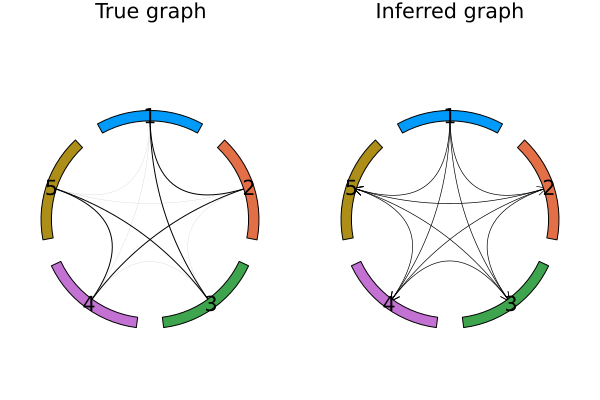

In [130]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij_new[1], edgewidth = abs.(Fij_new[1]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)

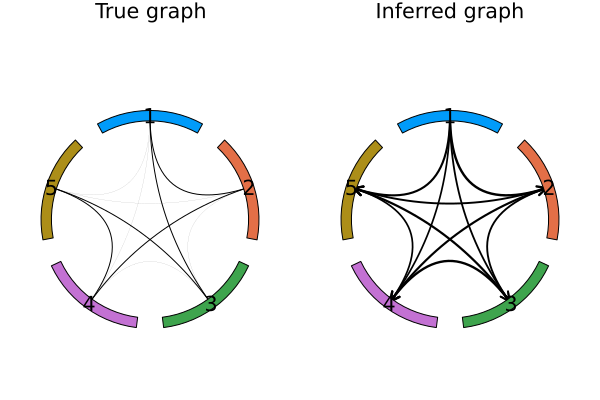

In [131]:
p3 = graphplot(Fij_new[2], edgewidth = abs.(Fij_new[2]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p3, aspect_ratio = 1)

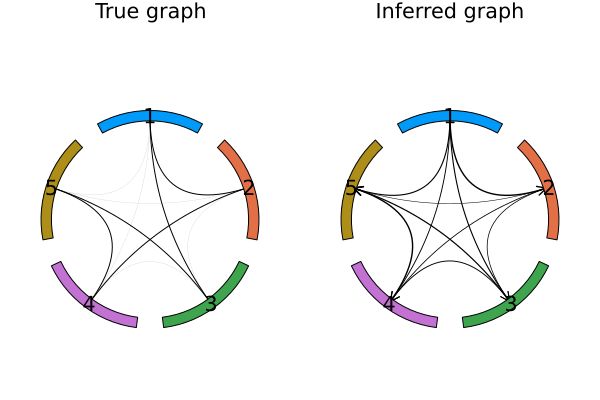

In [132]:
p4 = graphplot(Fij_new[3], edgewidth = abs.(Fij_new[3]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p4, aspect_ratio = 1)

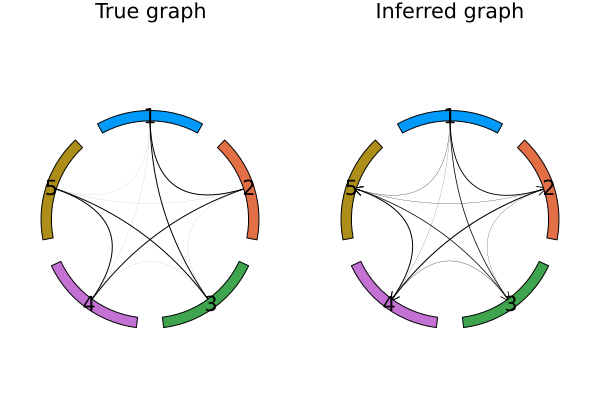

In [133]:
p5 = graphplot(Fij_new[4], edgewidth = abs.(Fij_new[4]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p5, aspect_ratio = 1)

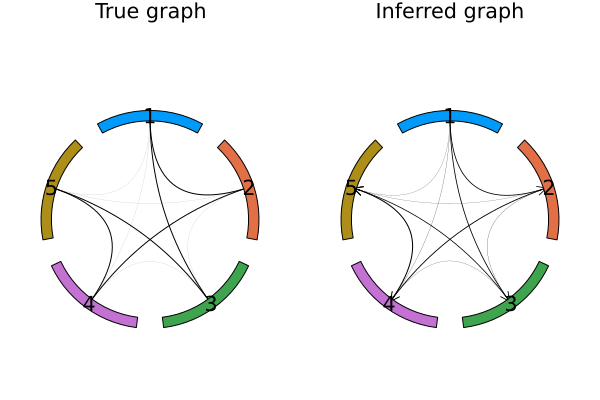

In [134]:
p6 = graphplot(Fij_new[5], edgewidth = abs.(Fij_new[5]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p6, aspect_ratio = 1)

By this comparison it becomes clear how much the number of observations is crucial in the inference process. Indeed we can see that while M is less than 500 observation it is almost impossible to detect the actual couplings, while if M is sufficiently large the Boltzamann machine allows us to spot them. It is also worth to note that for M greater than 1000 the inference process does not improve if M increases.  

One of the main problems of MCMC is that the samples are not independent. Therefore usually the collection of samples is done waiting a time interval $\Delta t$ that brings independece between samples. In order to quantify this correlation we estimate the autocorrelation function associated to the Markov chain that fetures the Bolzmann Machine. We recall that the autocorrelation function has the form:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu_t)(x^{(s)}-\mu_s)]}{\sqrt {\sigma_t^2\sigma_s^2}}
\end{align}
Because of the stationarity of the Markov chain we get:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu)(x^{(t+r)}-\mu)]}{\sigma^2}
\end{align} 
As seen in the lecture an unbiased Monte Carlo estimator of $\gamma$ is given by:
\begin{align}
\hat{\gamma}_n(r) = \frac{\frac{1}{n-r}\sum_{k=1}^{n-r}(\hat{x}^{(k)}-\hat{\mu}_n)(\hat{x}^{(k+r)}-\hat{\mu}_n)}{\frac{1}{n}\sum_{k=1}^{n}(\hat{x}^{(k)}-\hat{\mu}_n)^2}
\end{align}

In [ ]:
function autocorrelation(x::Array(Int64), R::Int64)
    n = lenght(x)
    μ = sum(x) / n
    gamma = [0.0 for i in 1:R]

    for r in 1:R
        for i in 1:(n-r+1)
            gamma[r] += (x[i] - μ) * (x[i+r-1] - μ) / (n - r + 1)
        end
    end

    var = gamma[1]
    gamma ./= var
end

We well vary the couples $(M,T_{wait})$ with the following values:
- $M = (1,10,100,500,1000)$
- $T_{wait} = (1,10,50,100,250)$

In [3]:
Tw = [1,10,50,100,200]
Xall = Array{Vector{Float64}}(undef, size(M), size(Tw))

for m in 1:size(M,1)
    for t in 1:size(Tw,1)
        Xall[m,t] = boltzmann_learning(compute_stats(xdata, M[m]), J, λ = 0.1, Tmax = 500, Twait = Tw[t], εmax = 1e-2)[4]
    end
end

#R has to be choosen

Ac = Array{Vector{Float64}}(undef, size(M), size(Tw))

for m in 1:size(M,1)
    for t in 1:size(Tw,1)
        Ac[m,t] = autocorrelation(Xall[m,t], R)
    end
end

ErrorException: syntax: incomplete: premature end of input